In [1]:
#This notebook is all code to achieve the contour plot for the Each of the data groups.

#The code has been altered 'slightly' from that presented initally in the following ways:

# Firstly, I have used ez = np.sqrt(om * (1+z)**3 + ok * (1+z)**2 + ol + orr) as my function for ez;

# Secondly, I have changed the axis limits on the final contour plot so as to better show the plot.



# First let's set up our packages
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate

# And set some constants
c = 299792.458 # km/s (speed of light)
H0kmsmpc = 70.  # Hubble constant in km/s/Mpc
H0s = H0kmsmpc * 3.2408e-20 # H0 in inverse seconds is H0 in km/s/Mpc * (3.2408e-20 Mpc/km)

# Write a function for the integrand, i.e. $1/E(z)$,
def ezinv(z,om=0.3,ol=0.7,w0=-1.0,wa=0.0,orr=0.0):
    ok = 1.-om-ol-orr
    ez = np.sqrt(om * (1+z)**3 + ok * (1+z)**2 + ol + orr) 
    return 1./ez

# The curvature correction function
def Sk(xx, ok):
    if ok < 0.0:
        dk = np.sin(np.sqrt(-ok)*xx)/np.sqrt(-ok)
    elif ok > 0.0:
        dk = np.sinh(np.sqrt(ok)*xx)/np.sqrt(ok)
    else:
        dk = xx
    return dk

# The distance modulus
def dist_mod(zs,om=0.3,ol=0.7,w0=-1.0,wa=0.0,orr=0.0):
    """ Calculate the distance modulus, correcting for curvature"""
    ok = 1.0 - om - ol
    xx = np.array([integrate.quad(ezinv, 0, z, args=(om, ol, w0, wa, orr))[0] for z in zs])
    D = Sk(xx, ok)
    lum_dist = D * (1 + zs) 
    dist_mod = 5 * np.log10(lum_dist) # Distance modulus
    # Add an arbitrary constant that's approximately the log of c on Hubble constant minus absolute magnitude of -19.5
    dist_mod = dist_mod + np.log(c/H0kmsmpc)-(-19.5)  # You can actually skip this step and it won't make a difference to our fitting
    return dist_mod

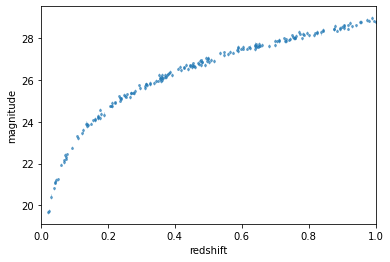

In [20]:
# Add a new function that reads in the data (data files should be in a directory called data)
def read_data(model_name):
    d = np.genfromtxt('data/'+model_name+'.txt',delimiter=',')
    zs = d[:,0]
    mu = d[:,1]
    muerr=d[:,2]
    return zs, mu, muerr

data_file = 'Data0'

zs, mu, muerr = read_data(data_file)

# Plot it to see what it looks like, this is called a Hubble diagram
plt.errorbar(zs,mu,yerr=muerr,fmt='.',elinewidth=0.7,markersize=4,alpha=0.5)
plt.xlim(0,1.0)
plt.xlabel('redshift')
plt.ylabel('magnitude')
plt.show()

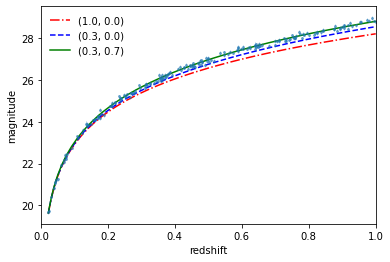

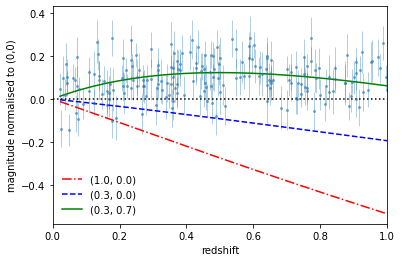

In [21]:
mu_om00_ox00 = dist_mod(zs,om=0.0,ol=0.0)  # We're going to use this empty model as a benchmark to compare the others to
mu_om10_ox00 = dist_mod(zs,om=1.0,ol=0.0)
mu_om03_ox00 = dist_mod(zs,om=0.3,ol=0.0)
mu_om03_ox07 = dist_mod(zs,om=0.3,ol=0.7)

# Plot it to see what it looks like, this is called a Hubble diagram
plt.errorbar(zs,mu,yerr=muerr,fmt='.',elinewidth=0.7,markersize=4,alpha=0.5)
plt.plot(zs,mu_om10_ox00,'-.',color='red',label='(1.0, 0.0)')
plt.plot(zs,mu_om03_ox00,'--',color='blue',label='(0.3, 0.0)')
plt.plot(zs,mu_om03_ox07,'-',color='green',label='(0.3, 0.7)')
plt.xlim(0,1.0)
plt.xlabel('redshift')
plt.ylabel('magnitude')
plt.legend(frameon=False)
plt.show()

# Now plot a Hubble diagram relative to the empty model (i.e. subtract the empty model from all the data and models)
plt.errorbar(zs,mu-mu_om00_ox00,yerr=muerr,fmt='.',elinewidth=0.7,markersize=4,alpha=0.5)
plt.plot(zs,mu_om10_ox00-mu_om00_ox00,'-.',color='red',label='(1.0, 0.0)')
plt.plot(zs,mu_om03_ox00-mu_om00_ox00,'--',color='blue',label='(0.3, 0.0)')
plt.plot(zs,mu_om03_ox07-mu_om00_ox00,'-',color='green',label='(0.3, 0.7)')
plt.axhline(y=0.0,ls=':',color='black')
plt.xlim(0,1.0)
plt.xlabel('redshift')
plt.ylabel('magnitude normalised to (0,0)')
plt.legend(frameon=False)
plt.show()

-0.3561283907502281 -0.1862487730765678 -0.0017102597211842742


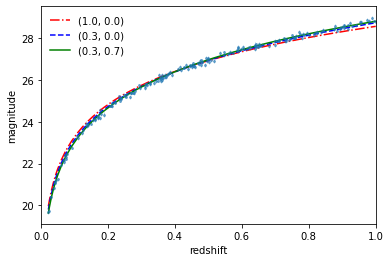

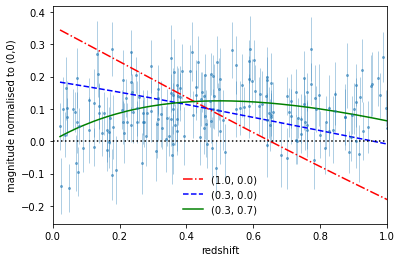

In [22]:
# Calculate mscript for each of these, which is the thing that determines the vertical normalisation 
mscr_om10_ox00 = np.sum((mu_om10_ox00-mu)/muerr**2)/np.sum(1./muerr**2)
mscr_om03_ox00 = np.sum((mu_om03_ox00-mu)/muerr**2)/np.sum(1./muerr**2)
mscr_om03_ox07 = np.sum((mu_om03_ox07-mu)/muerr**2)/np.sum(1./muerr**2)

print(mscr_om10_ox00,mscr_om03_ox00,mscr_om03_ox07)

mu_om10_ox00=mu_om10_ox00-mscr_om10_ox00
mu_om03_ox00=mu_om03_ox00-mscr_om03_ox00
mu_om03_ox07=mu_om03_ox07-mscr_om03_ox07

# Repeat the plot and see how it changes
# Plot it to see what it looks like, this is called a Hubble diagram
plt.errorbar(zs,mu,yerr=muerr,fmt='.',elinewidth=0.7,markersize=4,alpha=0.5)
plt.plot(zs,mu_om10_ox00,'-.',color='red',label='(1.0, 0.0)')
plt.plot(zs,mu_om03_ox00,'--',color='blue',label='(0.3, 0.0)')
plt.plot(zs,mu_om03_ox07,'-',color='green',label='(0.3, 0.7)')
plt.xlim(0,1.0)
plt.xlabel('redshift')
plt.ylabel('magnitude')
plt.legend(frameon=False)
plt.show()

# Now plot a Hubble diagram relative to the empty model (i.e. subtract the empty model from all the data and models)
plt.errorbar(zs,mu-mu_om00_ox00,yerr=muerr,fmt='.',elinewidth=0.7,markersize=4,alpha=0.5)
plt.plot(zs,mu_om10_ox00-mu_om00_ox00,'-.',color='red',label='(1.0, 0.0)')
plt.plot(zs,mu_om03_ox00-mu_om00_ox00,'--',color='blue',label='(0.3, 0.0)')
plt.plot(zs,mu_om03_ox07-mu_om00_ox00,'-',color='green',label='(0.3, 0.7)')
plt.axhline(y=0.0,ls=':',color='black')
plt.xlim(0,1.0)
plt.xlabel('redshift')
plt.ylabel('magnitude normalised to (0,0)')
plt.legend(frameon=False)
plt.show()

In [23]:
# Set up the arrays for the models you want to test, e.g. a range of Omega_m and Omega_Lambda models:
n = 21                          # Increase this for a finer grid
oms = np.linspace(-0.1, 0.5, n)   # Array of matter densities
ols = np.linspace(0.0, 1.0, n)   # Array of cosmological constant values
chi2 = np.ones((n, n)) * np.inf  # Array to hold our chi2 values, set initially to super large values

# Calculate Chi2 for each model
for i, om in enumerate(oms):                                          # loop through matter densities
        for j, ol in enumerate(ols):                                  # loop through cosmological constant densities
            mu_model = dist_mod(zs, om=om, ol=ol)                     # calculate the distance modulus vs redshift for that model 
            mscr = np.sum((mu_model-mu)/muerr**2)/np.sum(1./muerr**2) # Calculate the vertical offset to apply
            mu_model_norm = mu_model-mscr                             # Apply the vertical offset
            chi2[i,j] = np.sum((mu_model_norm - mu) ** 2 / muerr**2)  # Calculate the chi2 and save it in a matrix
            
# Convert that to a likelihood and calculate the reduced chi2
likelihood = np.exp(-0.5 * (chi2-np.amin(chi2)))  # convert the chi^2 to a likelihood (np.amin(chi2) calculates the minimum of the chi^2 array)
chi2_reduced = chi2 / (len(mu)-2)                 # calculate the reduced chi^2, i.e. chi^2 per degree of freedom, where dof = number of data points minus number of parameters being fitted 

# Calculate the best fit values (where chi2 is minimum)
indbest = np.argmin(chi2)                 # Gives index of best fit but where the indices are just a single number
ibest   = np.unravel_index(indbest,[n,n]) # Converts the best fit index to the 2d version (i,j)
print( 'Best fit values are (om,ol)=(%.3f,%.3f)'%( oms[ibest[0]], ols[ibest[1]] ) )
print( 'Reduced chi^2 for the best fit is %0.2f'%chi2_reduced[ibest[0],ibest[1]] )

Best fit values are (om,ol)=(0.230,0.600)
Reduced chi^2 for the best fit is 1.12


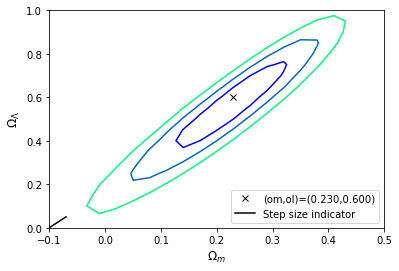

In [24]:
# Plot contours of 1, 2, and 3 sigma
plt.contour(oms,ols,np.transpose(chi2-np.amin(chi2)),cmap="winter",**{'levels':[2.30,6.18,11.83]})
plt.plot(oms[ibest[0]], ols[ibest[1]],'x',color='black',label='(om,ol)=(%.3f,%.3f)'%( oms[ibest[0]], ols[ibest[1]]) )
plt.xlabel("$\Omega_m$", fontsize=12)
plt.ylabel("$\Omega_\Lambda$", fontsize=12)
plt.plot([oms[0],oms[1]], [ols[0],ols[1]],'-',color='black',label='Step size indicator' ) # Delete this line after making step size smaller!
plt.legend(loc='lower right')
plt.savefig('plots/contours'+data_file+'.png', bbox_inches="tight", transparent=True)
plt.show()
plt.close()

